In [2]:
import open3d as o3d
import numpy as np
import cv2 as cv

In [3]:
info_dic = np.load('0001.npz')
info_dic.files

['optical_flow',
 'segmentation_masks',
 'segmentation_masks_indexes',
 'intrinsic_mat',
 'extrinsic_mat',
 'normal_map',
 'depth_map',
 'object_poses',
 'cam_loc',
 'cam_rot',
 'cam_scale']

In [4]:
depth = info_dic['depth_map']
seg = info_dic['segmentation_masks']
flow = info_dic['optical_flow']
normal = info_dic['normal_map']

In [6]:
INVALID_DEPTH = -1
depth_min = np.amin(depth[depth != INVALID_DEPTH])
depth_min

15.210023

In [7]:
""" option 1 """
#"""
depth_max = np.amax(depth) # if you have multiple images you can feed the min and max over all the images, to get a consistent looking depthmap
normalized_depth = (depth - depth_min)/(depth_max - depth_min) * 255.0
normalized_depth = normalized_depth.astype(np.uint8)
#"""

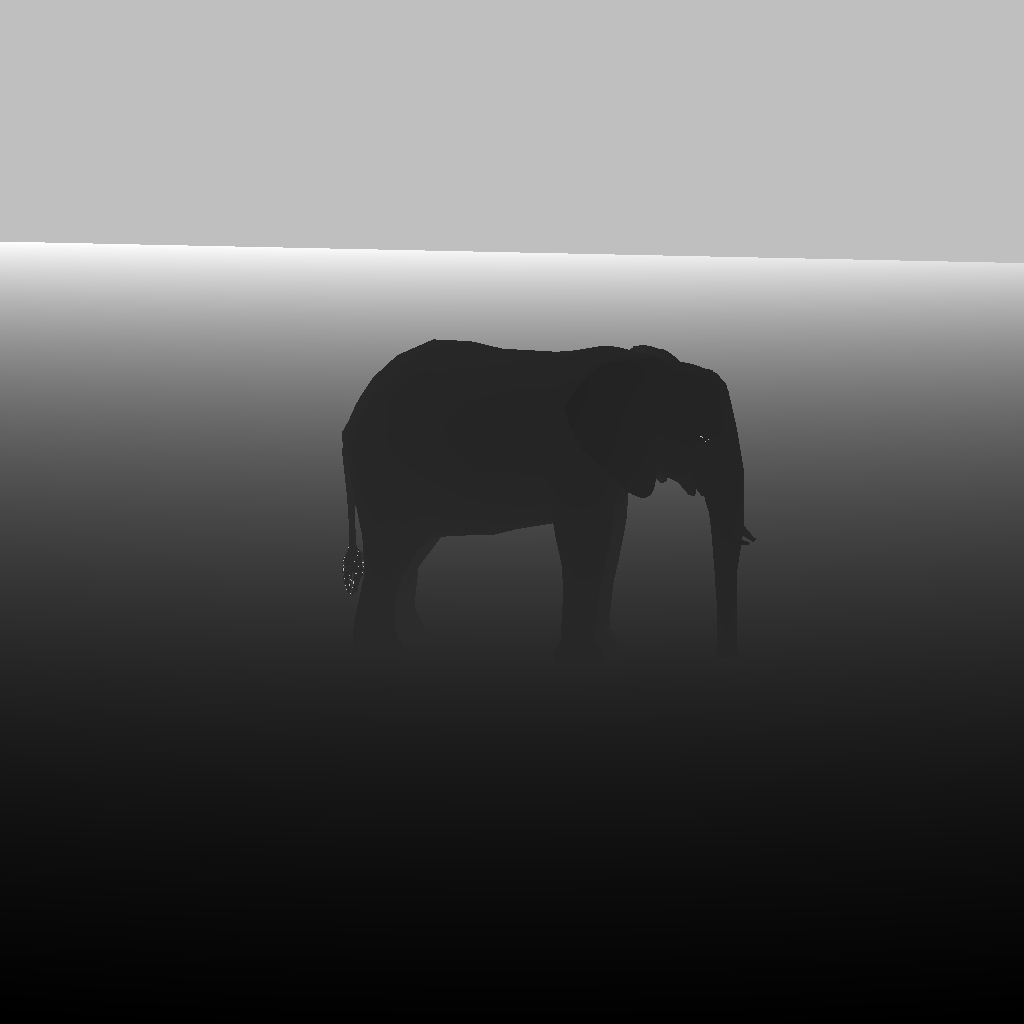

In [8]:
from PIL import Image
imm = Image.fromarray(normalized_depth)
imm

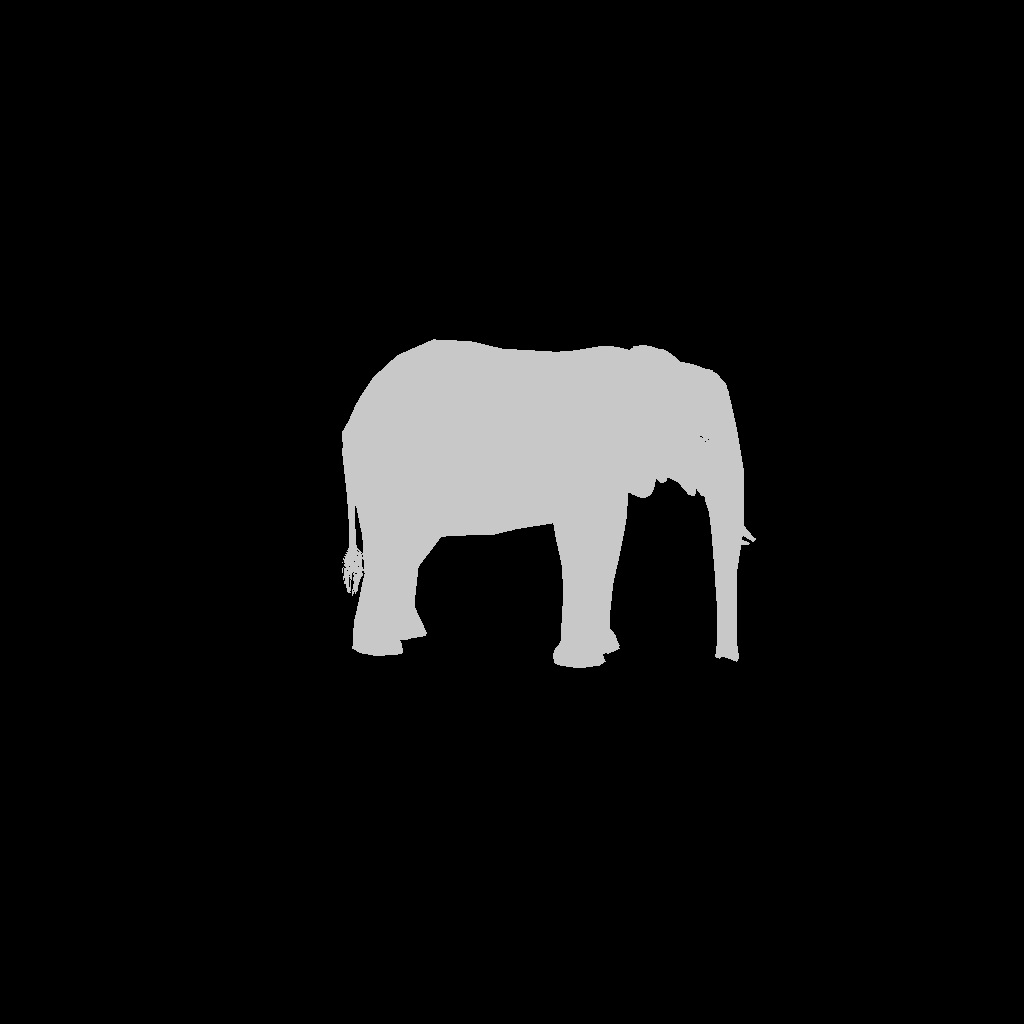

In [9]:
seg_img = Image.fromarray(seg.astype(np.uint8))
seg_img

In [10]:
path_img = '0001.png'
path_img_next = '0002.png'

In [78]:
img = cv.imread(path_img)
img_next = cv.imread(path_img_next)
# Alpha blending images (so that we can see both at the same time)
## The next frame will appear like a ghost after the current frame
dst = cv.addWeighted(img, 0.75, img_next, 0.25, 0)

# Draw optical flow - with arrows
gap_pixels = 15
rows, cols = dst.shape[:2]
arrows = np.zeros_like(dst)
for v in range(gap_pixels, rows, gap_pixels):
    for u in range(gap_pixels, cols, gap_pixels):
        flow_tmp = flow[v, u]
        pt1 = (u, v)
        pt2 = (u + int(round(flow_tmp[0])), v + int(round(flow_tmp[1])))
        cv.arrowedLine(arrows,
                       pt1=pt1,
                       pt2=pt2,
                       color=(0, 255, 0),
                       thickness=1, 
                       tipLength=.03)
dst = cv.addWeighted(dst, 1.00, arrows, 0.25, 0)

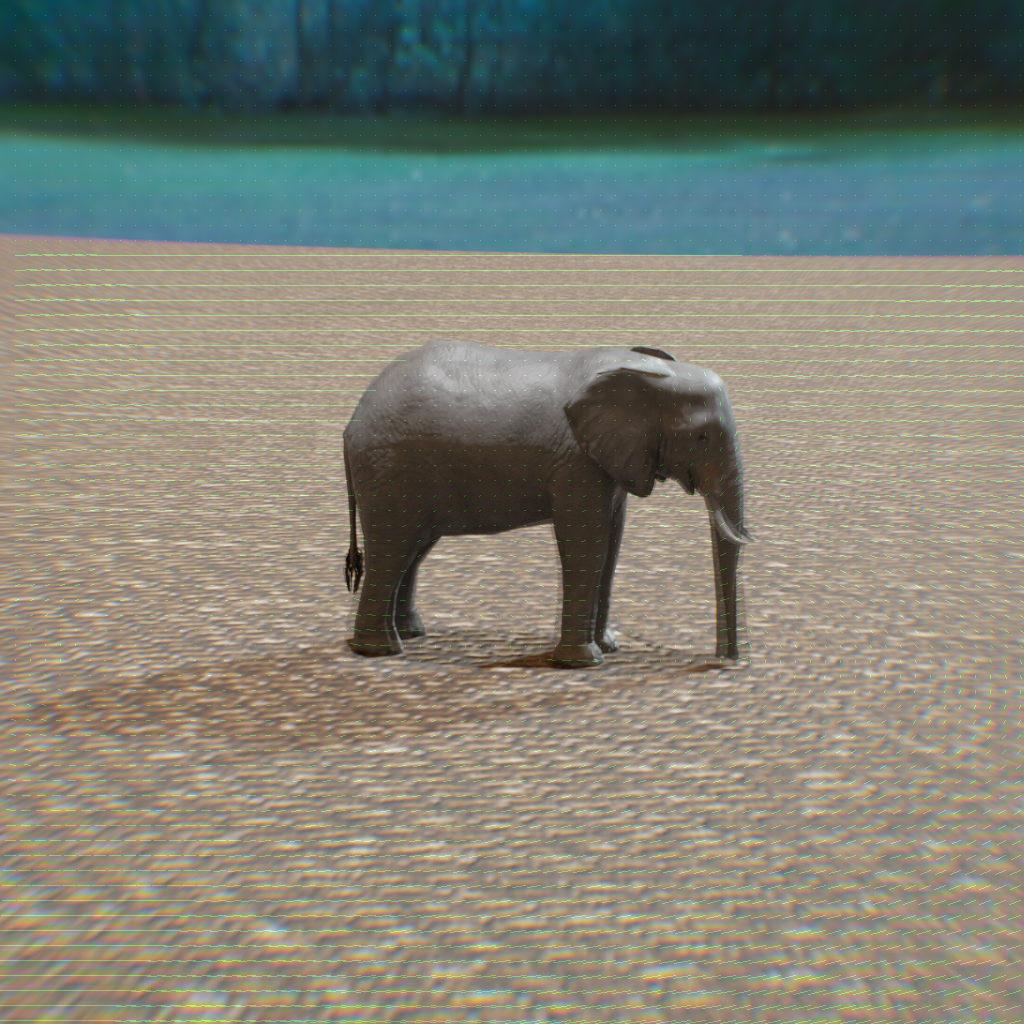

In [81]:
Image.fromarray(dst)